<a href="https://colab.research.google.com/github/yaman9675/NETFLIX-MOVIES-AND-TV-SHOW-RECOMMENDATION/blob/main/Yaman_NETFLIX_MOVIES_AND_TV_SHOWS_RECOMMENDATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Built a Recommender Systems



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

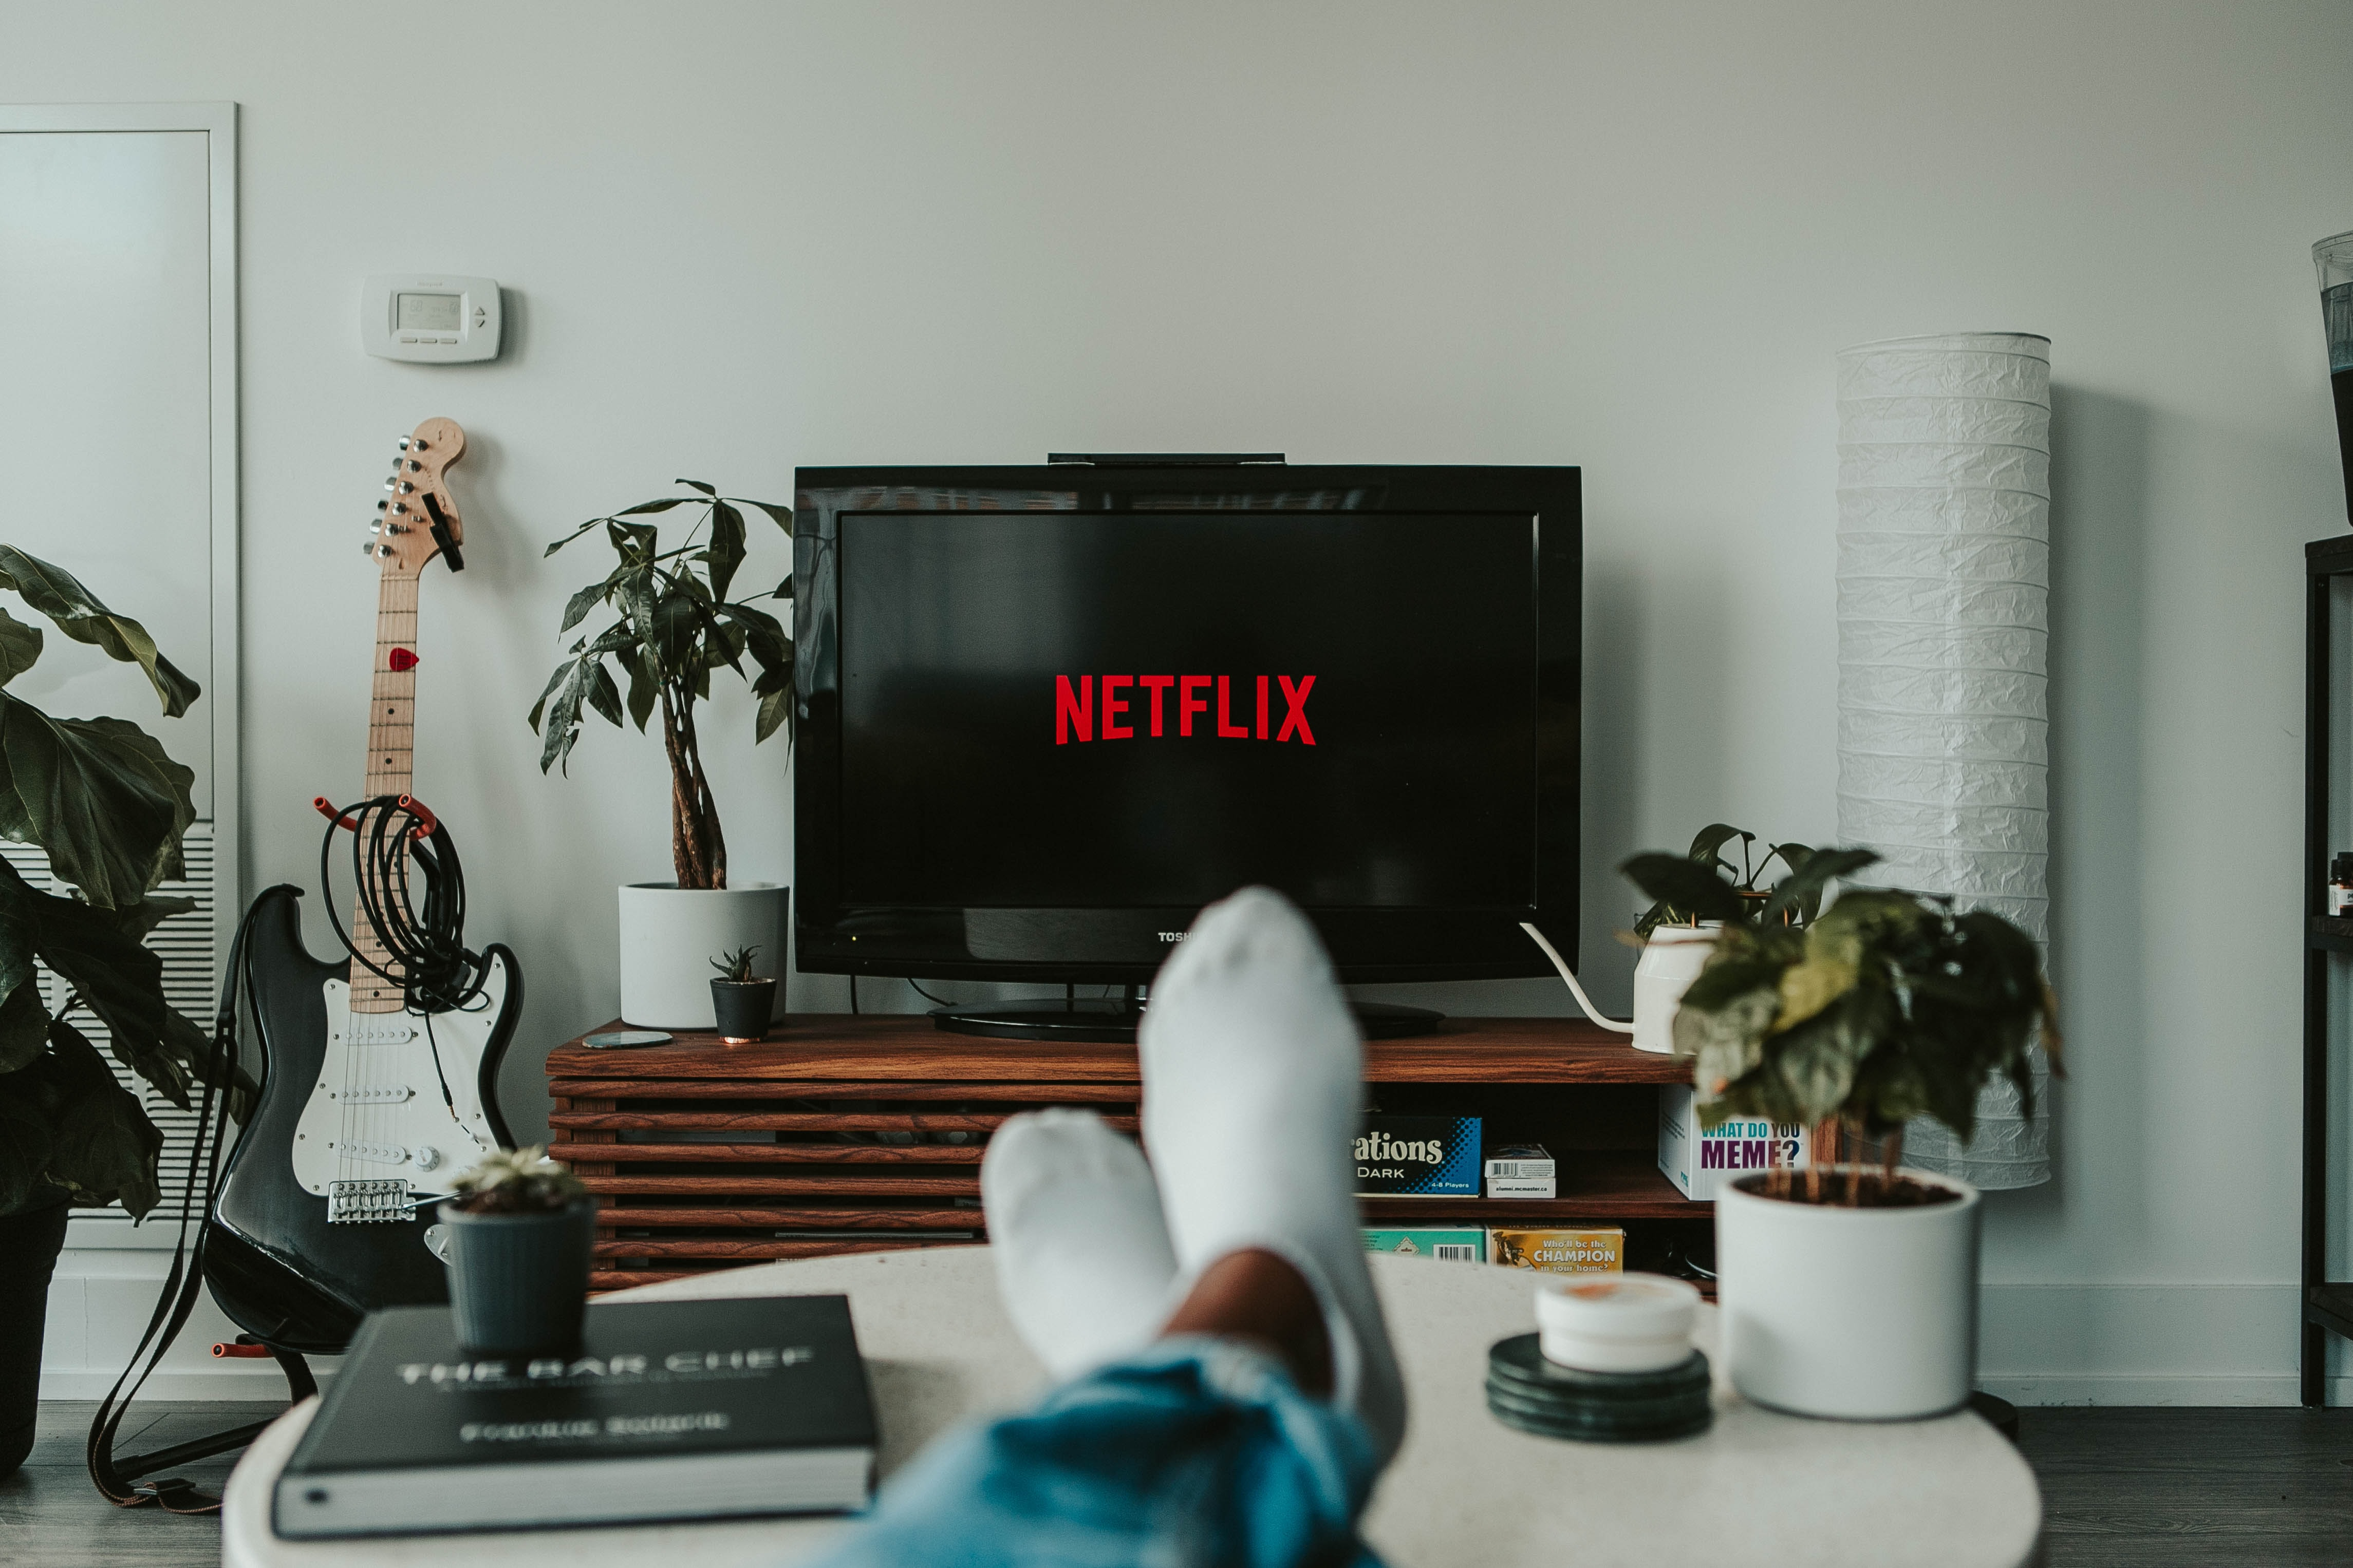

<a id="top"></a>
<div class="list-group" id="list-tab" role="tablist">
<h3 class="list-group-item list-group-item-action active" data-toggle="list" role="tab" aria-controls="home">Table of Content</h3>

* [1. Libraries and Project Variables](#1)
* [2. Reading the Data](#2)
* [3. EDA: Exploring Insights with xplotter](#3)
    - [3.1 TV Shows or Movies](#3.1)
    - [3.2 From the Oldest to the Newest Title](#3.2)
    - [3.3 How Many People Compose the Cast and Who are Them?](#3.3)
    - [3.4 From Where Netlix's Products Come From?](#3.4)
    - [3.5 Movies and TV Shows Duration (Minutes and Seasons)](#3.5)
    - [3.6 Dramas or Comedies? How Are Netflix Titles Listed In?](#3.6)
    - [3.7 Can Netflix Draw our Attention Just by Titles Description?](#3.7)
    - [3.8 Ratings on Netflix Catalog](#3.8)
* [4. Prep: Transforming the Data for a More Insights](#4)
    - [4.1 New Features From "type" Column](#4.1)
    - [4.2 New Features From "director" Column](#4.2)
    - [4.3 New Features From "cast" Column](#4.3)
    - [4.4 New Features From "country" Column](#4.4)
    - [4.5 New Features From "date_added" and "release_year" Columns](#4.5)
    - [4.6 New Features From "listed_in" Column](#4.6)
    - [4.7 New Features From "duration" Column](#4.7)
    - [4.8 Final Preparation](#4.8)
* [5. PCA: Reducing the Multidimensional Space](#5)

<a id="1"></a>
<font color="darkslateblue" size=+2.5><b>1. Libraries and Project Variables</b></font>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

In [ ]:
!pip install xplotter --upgrade
!pip install pycountry-convert
!pip install geopy
!pip install folium
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.1 MB 7.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 208 kB 41.0 MB/s 
     |████████████████████████████████| 297 kB 47.4 MB/s 
     |████████████████████████████████| 297 kB 45.1 MB/s 
     |████████████████████████████████| 297 kB 34.2 MB/s 
     |████████████████████████████████| 296 kB 47.8 MB/s 
     |████████████████████████████████| 296 kB 48.2 MB/s 
     |████████████████████████████████| 280 kB 44.2 MB/s 
     |████████████████████████████████| 280 kB 46.4 MB/s 
     |████████████████████████████████| 280 kB 48.0 MB/s 
     |████████████████████████████████| 280 kB 51.5 MB/s 
     |████████████████████████████████

In [ ]:
# Importing libraries
import pandas as pd
import os
from warnings import filterwarnings
filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Maps
import folium
from folium.plugins import Fullscreen
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2, country_name_to_country_alpha3, country_alpha2_to_country_name
from geopy.geocoders import Nominatim
import geopandas as gpd

# Xplotter
from xplotter.insights import *
from xplotter.formatter import format_spines

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<a id="2"></a>
<font color="darkslateblue" size=+2.5><b>2. Reading the Data</b></font>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

In [ ]:
# Reading the csv file
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone Project/NETFLIX MOVIES AND TV SHOWS CLUSTERING/NETFLIX MOVIES AND TV SHOWS RECOMMENDATION.csv')
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns')
df.head()

The dataset has 7787 rows and 12 columns


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


After defining some useful variables to be used along the project development, the given dataset was read and a first look could be taken on its content. As the project description says, the data consists on the Netflix tv shows and movies catalog of 2019 (or a more recent epoch as long as it's possible to see some tv shows with relase dated of 2020).

Even though, each row of the data has information about a tv show or a movie, like the title, cast, country, duration and others. On this first look, we can get a lot of ideas on how to implement a storytelling for presenting insights about the context.

In [ ]:
# Checking data type each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [ ]:
#checking nul values in each columns
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

<a id="3"></a>
<font color="darkslateblue" size=+2.5><b>3. EDA: Exploring Insights </b></font>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

This topic will be responsible for allocating efforts on gathering insights from the Netflix data with useful tools built in `xplotter` Python package. As the project goes on, it will be possible to use the functions of `xplotter` for plotting some good charts that can be served for visualizing insights in beautiful and informative ways.

For presenting a good storytelling on this task, let's divide the Exploratory Data Analysis into subtopics, each one consisting on subjects that can generate good discussions and conclusions. So, let's not only write codes and plot charts, but discuss around them and use them as powerful tools for helping us on reaching our analysis goals. Let's go!

<a id="3.1"></a>
<font color="dimgrey" size=+2.0><b>3.1 TV Shows or Movies?</b></font>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

Maybe the first question that can be in mind by looking at the data is: _does Netflix have more more tv shows or movies?_ This is a good question to answear using the data itself. So let's get our hands dirty and use our first function of `xplotter` for plotting a custom chart for looking at the balance between tv shows and movies.

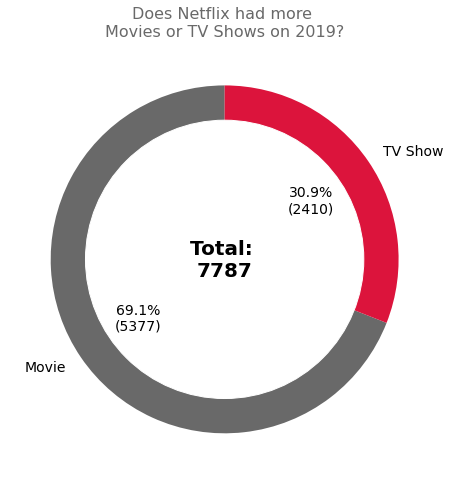

In [ ]:
# Balance of Netflix products
plot_donut_chart(df=df, col='type', colors=['dimgrey', 'crimson'],
                 title='Does Netflix had more \nMovies or TV Shows on 2019?')

It seems like Netflix has (or had) more movies than TV shows in a percentage of 69% against 31% approximately. But this lends us to the next question: _this behavior was always like that?_ For ansewaring this question we should have in hands information about previous years of Netflix catalog but, if we take a look at the **date_added** column, maybe we could make an evolution analysis on how the balance of movies and TV shows showed up for Netflix's customers.

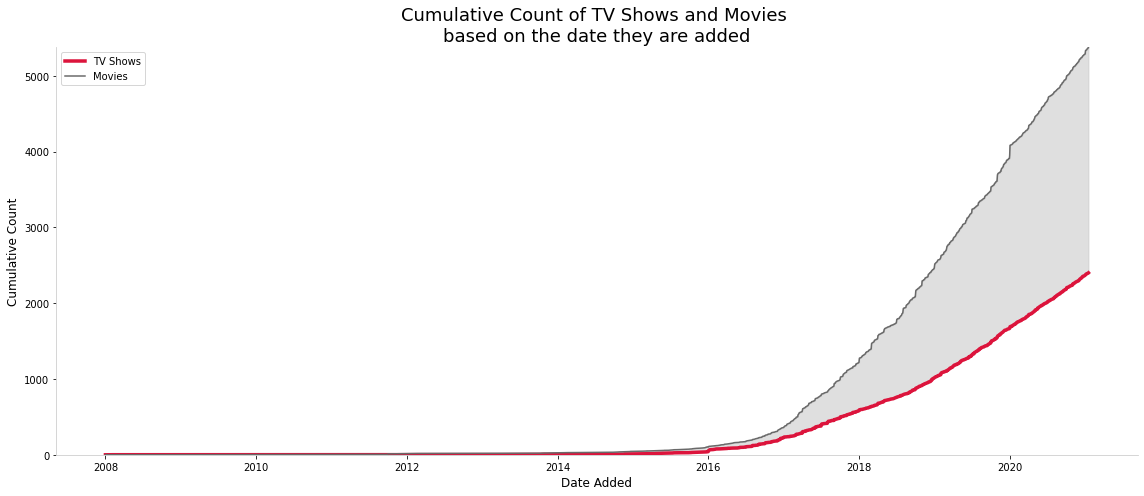

In [ ]:
# Creating a new datetime column for date_added info
df_prep = df.copy()
df_prep['date_added_dt'] = pd.to_datetime(df_prep['date_added'])

# Creating new columns for movie type
df_prep['is_tvshow'] = (df_prep['type'] == 'TV Show') * 1
df_prep['is_movie'] = (df_prep['type'] == 'Movie') * 1

# Sorting by date and applying a cumulative sum on type flags
df_prep.sort_values(by='date_added_dt', inplace=True)
df_prep['cumul_tvshow'] = df_prep['is_tvshow'].cumsum()
df_prep['cumul_movie'] = df_prep['is_movie'].cumsum()

# Plotting figure
fig, ax = plt.subplots(figsize=(16, 7))
sns.lineplot(x='date_added_dt', y='cumul_tvshow', data=df_prep, ax=ax, 
             color='crimson', label='TV Shows', linewidth=3.5, markers='x')
sns.lineplot(x='date_added_dt', y='cumul_movie', data=df_prep, ax=ax, 
             color='dimgrey', label='Movies')

# Extracting max y value
max_tvshow = df_prep['cumul_tvshow'].max()
max_movie = df_prep['cumul_movie'].max()
max_ylabel = max_movie if max_movie >= max_tvshow else max_tvshow

# Setting y limit and title
ax.set_ylim(0, max_ylabel)
ax.set_title('Cumulative Count of TV Shows and Movies \nbased on the date they are added', size=18)

# Additional customization
format_spines(ax)
ax.set_ylabel('Cumulative Count', size=12)
ax.set_xlabel('Date Added', size=12)
ax.fill_between(x=df_prep['date_added_dt'], y1=df_prep['cumul_movie'], y2=df_prep['cumul_tvshow'],
                color='silver', alpha=.5)

# Finishing plot
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

Well, knowing Netflix as itself, it's not clearly possible to say that the evolution scenario is 100% real. It's said because movies or TV shows can be eliminated from catalog and, as long as the data is consisted of a catalog snapshot from 2019, there's no way to tell if some movies or tv shows were already eliminated in the past.

Meanwhile, the linchart shows us that, in general, considering this catalog snapshot, the presence of movies are always higher than TV shows. By the way, it seems that the cumulative count of movies added on Netflix is increasing faster than the TV show rate.

> **Note:** the cumulative count chart above is something we must investigate a little deeper because it goes to the opposite way to the affirmative: "_In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled._"

<a id="3.2"></a>
<font color="dimgrey" size=+2.0><b>3.2 From the Oldest to the Newest Title</b></font>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

Well, by looking at the Netflix catalog, one good question to be made is: _how long do usually movies and tv shows last on catalog?_ You may have find yourself looking for a title that isn't on catalog anymore or else you probably got yourself surprised by finding some classical title on the list that you didn't expect.

Using the `date_added` column, let's set up some date for this snapshot (something around max `date_added`) and compute the difference between the date that each title was added do the streaming service and the snapshot date. With this information, it will be possible to see the distribution of titles by its ages.

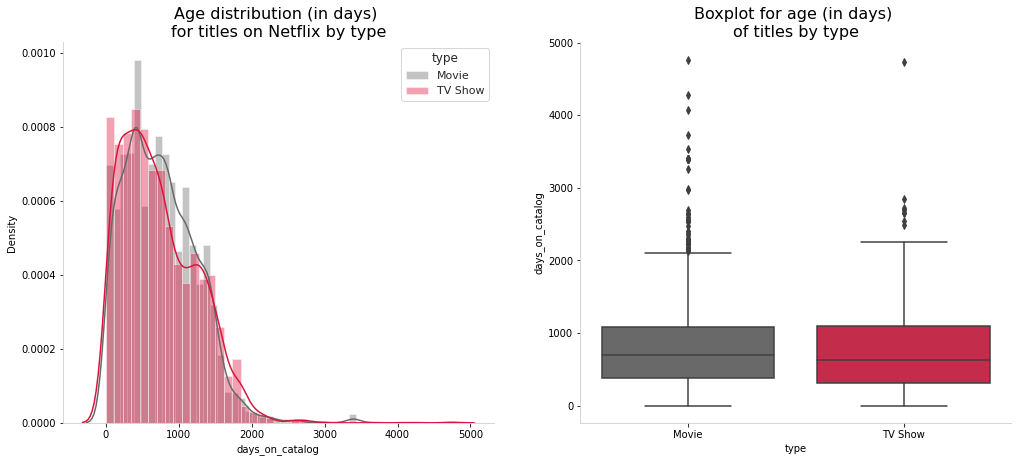

In [ ]:
# Setting snapshot date
df_prep['catalog_date'] = df_prep['date_added_dt'].max()

# Computing deltas
df_prep['days_on_catalog'] = (df_prep['catalog_date'] - df_prep['date_added_dt']).dt.days
df_prep['months_on_catalog'] = (df_prep['days_on_catalog'] / 30)
df_prep['years_on_catalog'] = (df_prep['days_on_catalog'] / 365)

# Creating figure and plotting statistical analysis
colors = ['dimgrey', 'crimson']
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(17, 7))
plot_distplot(df=df_prep, col='days_on_catalog', hue='type', ax=axs[0], color_list=colors,
              title='Age distribution (in days) \nfor titles on Netflix by type')
plot_distplot(df=df_prep, col='days_on_catalog', hue='type', ax=axs[1], palette=colors, kind='box',
              title='Boxplot for age (in days) \nof titles by type')

The age distribution of titles on the catalog are similar between movies and TV shows. One thing that can be pointed out is that movies are usually older than TV shows in terms of duration on catalog. We can see this by the boxtplot on the right where we have some outliers indicating really old movies (the median also reflects this behavior).

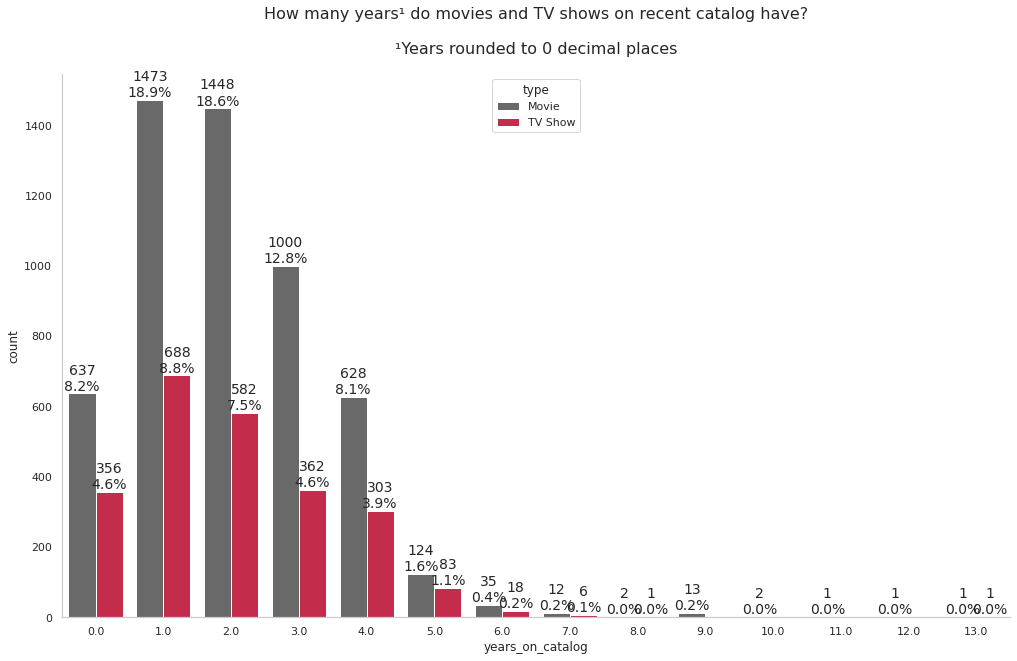

In [ ]:
df_prep['years_on_catalog'] = round(df_prep['years_on_catalog'], 0)
plot_countplot(df=df_prep, col='years_on_catalog', hue='type', figsize=(17, 10), palette=colors,
               title='How many years¹ do movies and TV shows on recent catalog have?\n\n¹Years rounded to 0 decimal places')

After extracting an age information of the data, many things can be explored. The cells bellow brings us a vision of the top 5 oldest and newst movies and TV shows. Let's see if we are enjoying Netflix the right way!

___
* **_Top 5 movies with most days on catalog_**
___

In [ ]:
# Top 5 oldest movies
cols = ['type', 'title', 'country', 'date_added', 'release_year', 'duration']
print(f'Top 5 movies with most days on catalog')
df_prep.query('type == "Movie"').sort_values(by='days_on_catalog', ascending=False).head().loc[:, cols]

Top 5 movies with most days on catalog


,type,title,country,date_added,release_year,duration
7113,Movie,To and From New York,United States,"January 1, 2008",2006,81 min
3248,Movie,Just Another Love Story,Denmark,"May 5, 2009",2007,104 min
5765,Movie,Splatter,United States,"November 18, 2009",2009,29 min
3840,Movie,Mad Ron's Prevues from Hell,United States,"November 1, 2010",1987,84 min
2041,Movie,Even the Rain,"Spain, Mexico, France","May 17, 2011",2010,103 min


___
* **_Top 5 movies recently added on catalog_**
___

In [ ]:
# Top 5 newest movies
print(f'Top 5 movies recently added on catalog')
df_prep.query('type == "Movie"').sort_values(by='days_on_catalog', ascending=True).head().loc[:, cols]

Top 5 movies recently added on catalog


,type,title,country,date_added,release_year,duration
205,Movie,A Monster Calls,"United Kingdom, Spain, United States","January 16, 2021",2016,108 min
5059,Movie,Radium Girls,United States,"January 16, 2021",2018,103 min
1673,Movie,Death of Me,"United States, Thailand","January 16, 2021",2020,94 min
7644,Movie,Wish You,NaN,"January 15, 2021",2021,102 min
7220,Movie,Tribhanga - Tedhi Medhi Crazy,NaN,"January 15, 2021",2021,96 min


___
* **_Top 5 TV shows with most days on catalog_**
___

In [ ]:
# Top 5 oldest movies
print(f'Top 5 TV Shows with most days on catalog')
df_prep.query('type == "TV Show"').sort_values(by='days_on_catalog', ascending=False).head().loc[:, cols]

Top 5 TV Shows with most days on catalog


,type,title,country,date_added,release_year,duration
1765,TV Show,Dinner for Five,United States,"February 4, 2008",2007,1 Season
3098,TV Show,Jack Taylor,"United States, Ireland","March 31, 2013",2016,1 Season
1089,TV Show,Breaking Bad,United States,"August 2, 2013",2013,5 Seasons
6056,TV Show,The 4400,"United States, United Kingdom","September 1, 2013",2007,4 Seasons
2503,TV Show,Gossip Girl,United States,"October 8, 2013",2012,6 Seasons


___
* **_Top 5 TV shows recently added on catalog_**
___

In [ ]:
# Top 5 newest movies
print(f'Top 5 TV shows recently added on catalog')
df_prep.query('type == "TV Show"').sort_values(by='days_on_catalog', ascending=True).head().loc[:, cols]

Top 5 TV shows recently added on catalog


,type,title,country,date_added,release_year,duration
6634,TV Show,The Magicians,"United States, Canada","January 15, 2021",2020,5 Seasons
2699,TV Show,Henry Danger,United States,"January 15, 2021",2016,3 Seasons
980,TV Show,Bling Empire,NaN,"January 15, 2021",2021,1 Season
1780,TV Show,Disenchantment,United States,"January 15, 2021",2021,3 Seasons
1222,TV Show,Carmen Sandiego,United States,"January 15, 2021",2021,4 Seasons


<a id="3.3"></a>
<font color="dimgrey" size=+2.0><b>3.3 How Many People Compose the Cast and Who are Them?</b></font>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

By looking at the top titles on the tables above, it raised a idea on also looking at the people who were part of the movies or TV shows. With this we are talking about directors and cast. Let's use the `cast` column for creating a list of cast for each line and counting how many people participated on the movie or TV show creation.

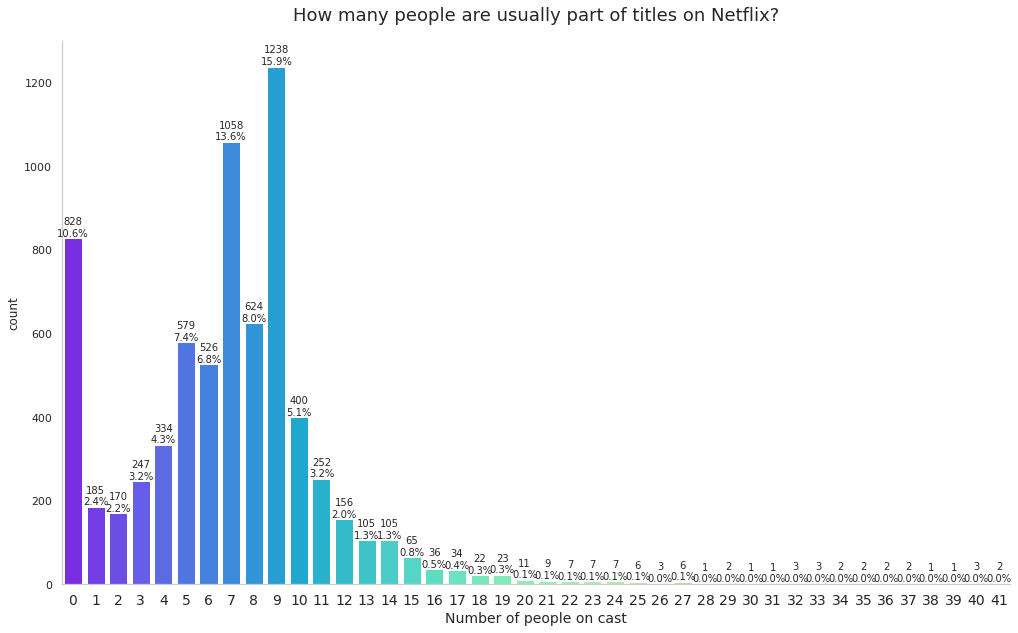

In [ ]:
# Creating a function for extracting people on cast
def num_people_on_cast(cast_str, splitter=','):
    try:
        return int(len(cast_str.split(splitter)))
    except AttributeError as ae:
        return np.nan

# Extracting total people on cast
df_prep['num_people_on_cast'] = df_prep['cast'].apply(lambda x: num_people_on_cast(x))

# Plotting figure
fig, ax = plt.subplots(figsize=(17, 10))
plot_countplot(df=df_prep, col='num_people_on_cast', ax=ax, size_labels=10,
               title='How many people are usually part of titles on Netflix?', size_title=18)

# Customizing chart
ax.set_xticklabels(ax.get_xticks(), rotation=0)
ax.set_xlabel('Number of people on cast', size=14)
plt.xticks(fontsize=(14))
plt.show()

The countplot above shows a distribution of people on cast for titles on Netflix catalog. We can see that there are 1,238 titles with 9 people on cast and this is the marjority configuration. A low quantity of titles have more than 15 people on cast.

But how about actors and actresses? Who are them? Let's make a little change on our dataset and extract who appears most on Netflix catalog.

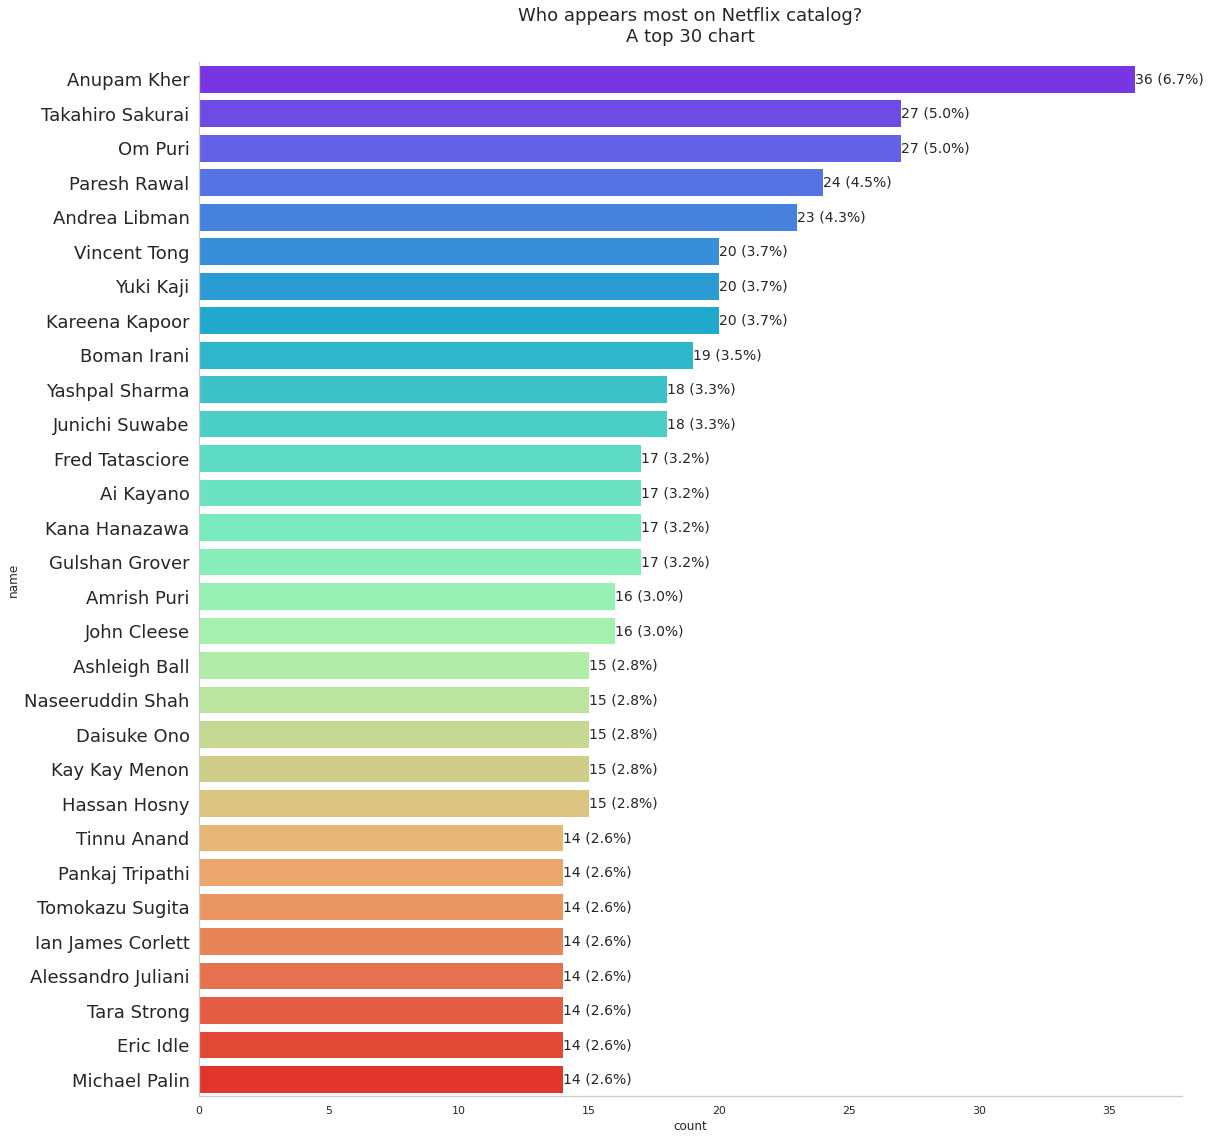

In [ ]:
# Defining function for extracting individual names from cast list
def extract_list_from_string(cast_str, splitter=','):
    try:
        return [c.strip() for c in cast_str.split(splitter)]
    except AttributeError as ae:
        return np.nan

# Extracting actors and actresses
cast_list = extract_list_from_string(''.join(list(df_prep['cast'].fillna(' ').values)))
df_cast = pd.DataFrame(cast_list, columns=['name'])

# Counting appearence
plot_countplot(df=df_cast, col='name', top=30, order=True, orient='h', figsize=(17, 16),
               title='Who appears most on Netflix catalog?\nA top 30 chart', size_title=18)

# Customizing chart
plt.yticks(fontsize=(18))
plt.tight_layout()
plt.show()

Well, it seems that [Anupam Kher](https://www.google.com/search?channel=fs&client=ubuntu&q=anupam+kher) is the actor who appears most considering the names on cast for all titles on Netflix catalog. Other common names includes [Takahiro Sakurai](https://www.google.com/search?q=takahiro+sakurai&client=ubuntu&channel=fs&sxsrf=ALeKk02W_E6eaQ-4u8mhkSsoKZ477L3LWA%3A1621031057565&ei=kfieYILyIYbK_Qa38LeIDw&oq=takahiro+sakurai&gs_lcp=Cgdnd3Mtd2l6EAMyCAguEMsBEJMCMgIIADICCAAyAggAMgIIADIFCAAQywEyBQgAEMsBMgUIABDLATIFCAAQywEyBQgAEMsBOgcIABCwAxBDOg0ILhCwAxDIAxBDEJMCOgoILhCwAxDIAxBDOgYIIxAnEBM6BAgjECc6CAgAELEDEIMBOgQILhBDOgQIABBDOgUIABCxAzoFCC4QsQM6AgguOgcILhCxAxBDOgsIABCxAxDHARCjAjoHCAAQsQMQQzoKCC4QsQMQQxCTAjoLCAAQsQMQxwEQrwE6DggAELEDEIMBEMcBEKMCOggIABDHARCvAToICC4QsQMQkwI6BQguEMsBOgoILhCxAxANEJMCOgQILhANOgQIABANOgoIABDHARCvARANOgYIABANEAo6BggAEA0QHjoFCC4QkwJKBQg4EgExUJ-pA1jjwQNgzsIDaAZwAHgAgAGPAogBoSGSAQcwLjEwLjEwmAEAoAEBqgEHZ3dzLXdpesgBCMABAQ&sclient=gws-wiz&ved=0ahUKEwjC_uuim8rwAhUGZd8KHTf4DfEQ4dUDCA0&uact=5), [Om Puri](https://www.google.com/search?q=om+puril&client=ubuntu&channel=fs&sxsrf=ALeKk02tU6yaTTUh61J9MO8idU-5KAEO-g%3A1621031117221&ei=zfieYNDwDM2m_QaG-oeACw&oq=om+puril&gs_lcp=Cgdnd3Mtd2l6EAMyBQguEJMCMgIIADICCAAyBQgAEMsBMgUIABDLATIFCAAQywEyBQgAEMsBMgUIABDLATIFCAAQywEyBQgAEMsBOgcIABCwAxBDOg0ILhCwAxDIAxBDEJMCOgoILhCwAxDIAxBDOgQIIxAnOgQILhBDOgQIABBDOggIABCxAxCDAToFCAAQsQM6CAguELEDEIMBOg4IABCxAxCDARDHARCvAToFCC4QsQM6AgguOggIABDHARCvAToECAAQCkoFCDgSATFQg1NY_1hg9VloAXAAeACAAf8BiAH2DJIBBTAuNC40mAEAoAEBqgEHZ3dzLXdpesgBB8ABAQ&sclient=gws-wiz&ved=0ahUKEwiQi6W_m8rwAhVNU98KHQb9AbAQ4dUDCA0&uact=5), [Paresh Rawal](https://www.google.com/search?q=paresh+rawal&client=ubuntu&channel=fs&sxsrf=ALeKk03hYI6kzOgZbADhHQzKw4qs44Q6Wg%3A1621031130346&ei=2vieYLymFOzB_Qa516eQBw&oq=paresh+rawal&gs_lcp=Cgdnd3Mtd2l6EAMyBQguEJMCMgUIABDLATIFCAAQywEyBQgAEMsBMgUIABDLATIFCAAQywEyBQgAEMsBMgUIABDLATIFCAAQywEyBQgAEMsBOgoILhCwAxANEJMCOgcIABCwAxANOgkIABCwAxANEB46BggjECcQEzoECCMQJzoECAAQQzoICC4QsQMQgwE6CAgAELEDEIMBOgUILhCxAzoCCAA6BQgAELEDOgIILjoKCAAQxwEQrwEQQzoICAAQxwEQrwE6BwguEEMQkwI6CggAEMcBEK8BEAo6BAgAEAo6BQguEMsBUJc_WOtKYNBLaAFwAHgAgAGTAogBkRKSAQUwLjIuOZgBAKABAaoBB2d3cy13aXrIAQrAAQE&sclient=gws-wiz&ved=0ahUKEwi8-8XFm8rwAhXsYN8KHbnrCXIQ4dUDCA0&uact=5), [Andrea Libman](https://www.google.com/search?q=andrea+libman&client=ubuntu&channel=fs&sxsrf=ALeKk00b0gfagSmkefMKaTXJKaNkFzZcWg%3A1621031142040&ei=5vieYM_EAe6mggfZhqfoDw&oq=andrea+libman&gs_lcp=Cgdnd3Mtd2l6EAMyBQguEJMCMgUIABDLATIFCAAQywEyBQgAEMsBMgUIABDLATIFCAAQywEyBQgAEMsBMgUIABDLATIFCAAQywEyBQgAEMsBOgcIABCwAxBDOgkIABCwAxAHEB46CAgAELADEMsBOg0ILhCwAxDIAxBDEJMCOgoILhCwAxDIAxBDOgQIIxAnOgQILhBDOgUIABCxAzoFCC4QsQM6CAguELEDEIMBOgIIADoICC4QsQMQkwI6CAgAELEDEIMBOgIILjoHCC4QsQMQCjoICAAQxwEQrwE6CwguELEDEIMBEJMCOgQILhAKOgcILhAKEMsBSgUIOBIBMVDRXliTaGCWaWgBcAB4AIABjAKIAZgUkgEGMC4xLjExmAEAoAEBqgEHZ3dzLXdpesgBD8ABAQ&sclient=gws-wiz&ved=0ahUKEwjPz4_Lm8rwAhVuk-AKHVnDCf0Q4dUDCA0&uact=5), [Kareena Kappor](https://www.google.com/search?q=kareena+kapoor&client=ubuntu&hs=s73&channel=fs&sxsrf=ALeKk02svmj1JyDSY8f2YcxpKAz28KYK3Q%3A1621029439287&ei=P_KeYIPkEPK6ggeRj4uAAg&gs_ssp=eJzj4tTP1TcwMjc1yzJg9OLLTixKTc1LVMhOLMjPLwIAZtUIWQ&oq=kareena+kap&gs_lcp=Cgdnd3Mtd2l6EAMYADIICC4QywEQkwIyBQgAEMsBMgUIABDLATICCAAyAggAMgIIADICCAAyBQgAEMsBMgUIABDLATIFCAAQywE6CQgAELADEAcQHjoHCAAQsAMQQzoFCAAQsAM6DQguELADEMgDEEMQkwI6CgguELADEMgDEEM6BwguEEMQkwI6BAguEEM6BAgjECc6BQguELEDOgIILjoICC4QsQMQgwE6BQgAELEDOggIABCxAxCDAToICC4QsQMQkwI6BAguEAo6CAgAEMcBEK8BOgcILhANEJMCOgQIABANSgUIOBIBMVD7wWJYhc5iYL_UYmgCcAB4AIABpgKIAeEWkgEGMC4xLjEymAEAoAEBqgEHZ3dzLXdpesgBCcABAQ&sclient=gws-wiz) and others.

Looking at the names on the chart includes actors, actresses, voice actors and voice actresses and everyone who ever made part of the movie or show. By talking on that, it would be nice to see the cast appearence for each type of tile (movies and TV shows). So the chart above will apply this analysis by counting people appearence only on movies (left - gray) and only on TV shows (right - red)

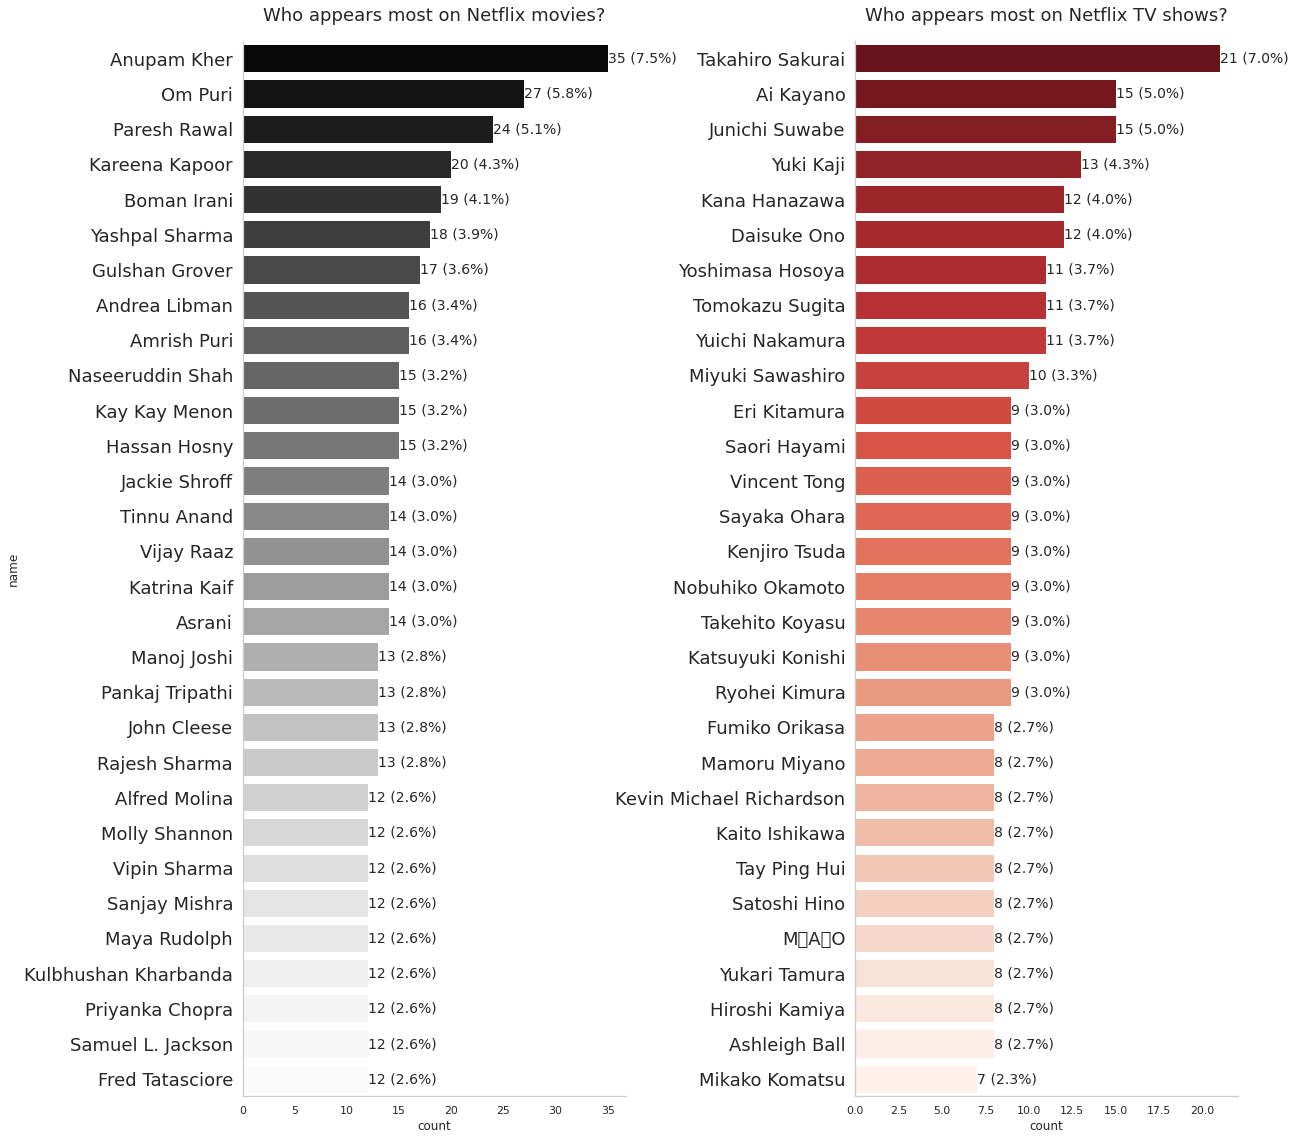

In [ ]:
# Creating subsets for movies and TV shows
df_movies = df_prep.query('type == "Movie"')
df_tvs = df_prep.query('type == "TV Show"')

# Extracting actors and actresses
movies_cast_list = extract_list_from_string(''.join(list(df_movies['cast'].fillna(' ').values)))
df_cast_movies = pd.DataFrame(movies_cast_list, columns=['name'])
tvs_cast_list = extract_list_from_string(''.join(list(df_tvs['cast'].fillna(' ').values)))
df_cast_tvs = pd.DataFrame(tvs_cast_list, columns=['name'])

# Counting appearence
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(17, 16))

# Plotting appearence on movies and TV Shows
plot_countplot(df=df_cast_movies, col='name', top=30, order=True, orient='h', ax=axs[0],
               title='Who appears most on Netflix movies?', size_title=18, palette='Greys_r')
plot_countplot(df=df_cast_tvs, col='name', top=30, order=True, orient='h', ax=axs[1],
               title='Who appears most on Netflix TV shows?', size_title=18, palette='Reds_r')

# Tighting layout
plt.tight_layout()
plt.setp(axs[0].get_yticklabels(), fontsize=18)
plt.setp(axs[1].get_yticklabels(), fontsize=18)
axs[1].set_ylabel('')
plt.show()

Now it seems we have a different scenario. By looking at the numbers, it's possible to see that [Anupam Kher](https://www.google.com/search?channel=fs&client=ubuntu&q=anupam+kher) made 36 appearence on total and 25 of them were on movies. He's not like to beeing found on TV shows. Meanwhile, [Takahiro Sakurai](https://www.google.com/search?q=takahiro+sakurai&client=ubuntu&channel=fs&sxsrf=ALeKk02W_E6eaQ-4u8mhkSsoKZ477L3LWA%3A1621031057565&ei=kfieYILyIYbK_Qa38LeIDw&oq=takahiro+sakurai&gs_lcp=Cgdnd3Mtd2l6EAMyCAguEMsBEJMCMgIIADICCAAyAggAMgIIADIFCAAQywEyBQgAEMsBMgUIABDLATIFCAAQywEyBQgAEMsBOgcIABCwAxBDOg0ILhCwAxDIAxBDEJMCOgoILhCwAxDIAxBDOgYIIxAnEBM6BAgjECc6CAgAELEDEIMBOgQILhBDOgQIABBDOgUIABCxAzoFCC4QsQM6AgguOgcILhCxAxBDOgsIABCxAxDHARCjAjoHCAAQsQMQQzoKCC4QsQMQQxCTAjoLCAAQsQMQxwEQrwE6DggAELEDEIMBEMcBEKMCOggIABDHARCvAToICC4QsQMQkwI6BQguEMsBOgoILhCxAxANEJMCOgQILhANOgQIABANOgoIABDHARCvARANOgYIABANEAo6BggAEA0QHjoFCC4QkwJKBQg4EgExUJ-pA1jjwQNgzsIDaAZwAHgAgAGPAogBoSGSAQcwLjEwLjEwmAEAoAEBqgEHZ3dzLXdpesgBCMABAQ&sclient=gws-wiz&ved=0ahUKEwjC_uuim8rwAhUGZd8KHTf4DfEQ4dUDCA0&uact=5) appeared 27 times overall but 21 of them were on TV shows.

How about directors? Let's see the top 10 directors with more appearence on Netflix catalog.

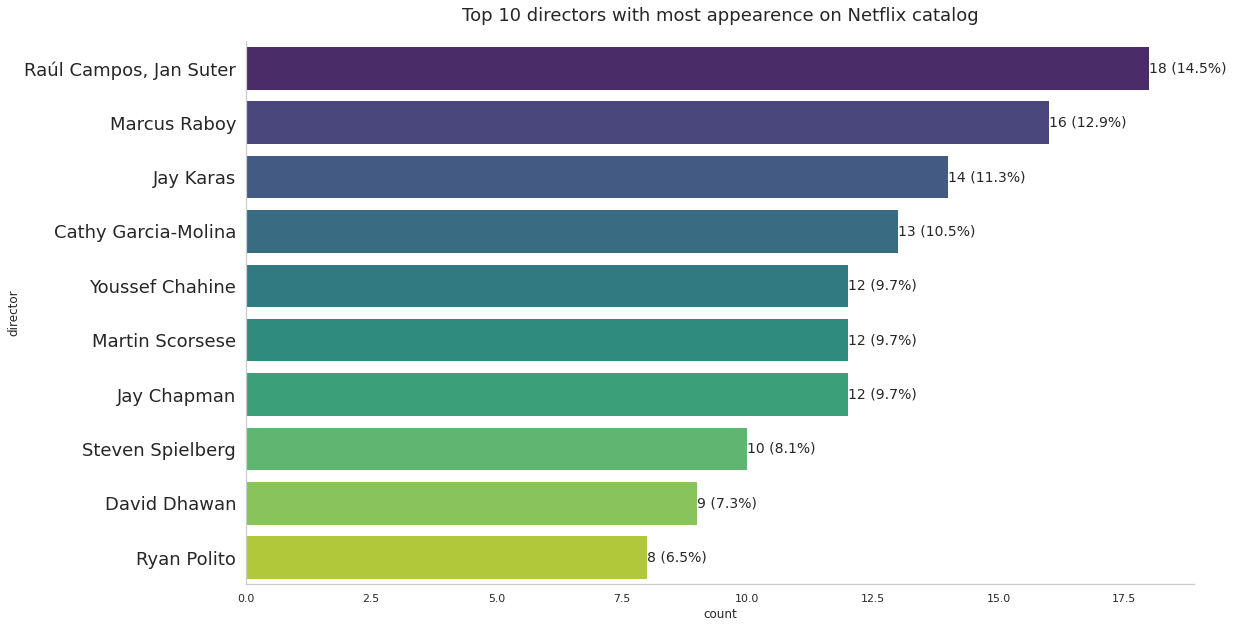

In [ ]:
# Top 10 directors
plot_countplot(df=df, col='director', top=10, orient='h', order=True, figsize=(17, 10), palette='viridis',
               title='Top 10 directors with most appearence on Netflix catalog', size_title=18)
plt.yticks(fontsize=(18))
plt.show()

We can see some really known names on the top 10 list. If you don't recognize any of them, you should use more Netflix service :D

<a id="3.5"></a>
<font color="dimgrey" size=+2.0><b>3.5 Movies and TV Shows Duration (Minutes and Seasons)</b></font>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

By now, let's extract information on `duration` column for movies and TV shows for visualizing some patterns on Netflix catalog. The idea is to split the source data on this column in order to extract the numerical value and the scale. Looking at the data, it's possible to see that we have different scales for movies (minutes) and TV shows (seasons) and, because of this, we will plot two different charts for looking at titles duration for this two types.

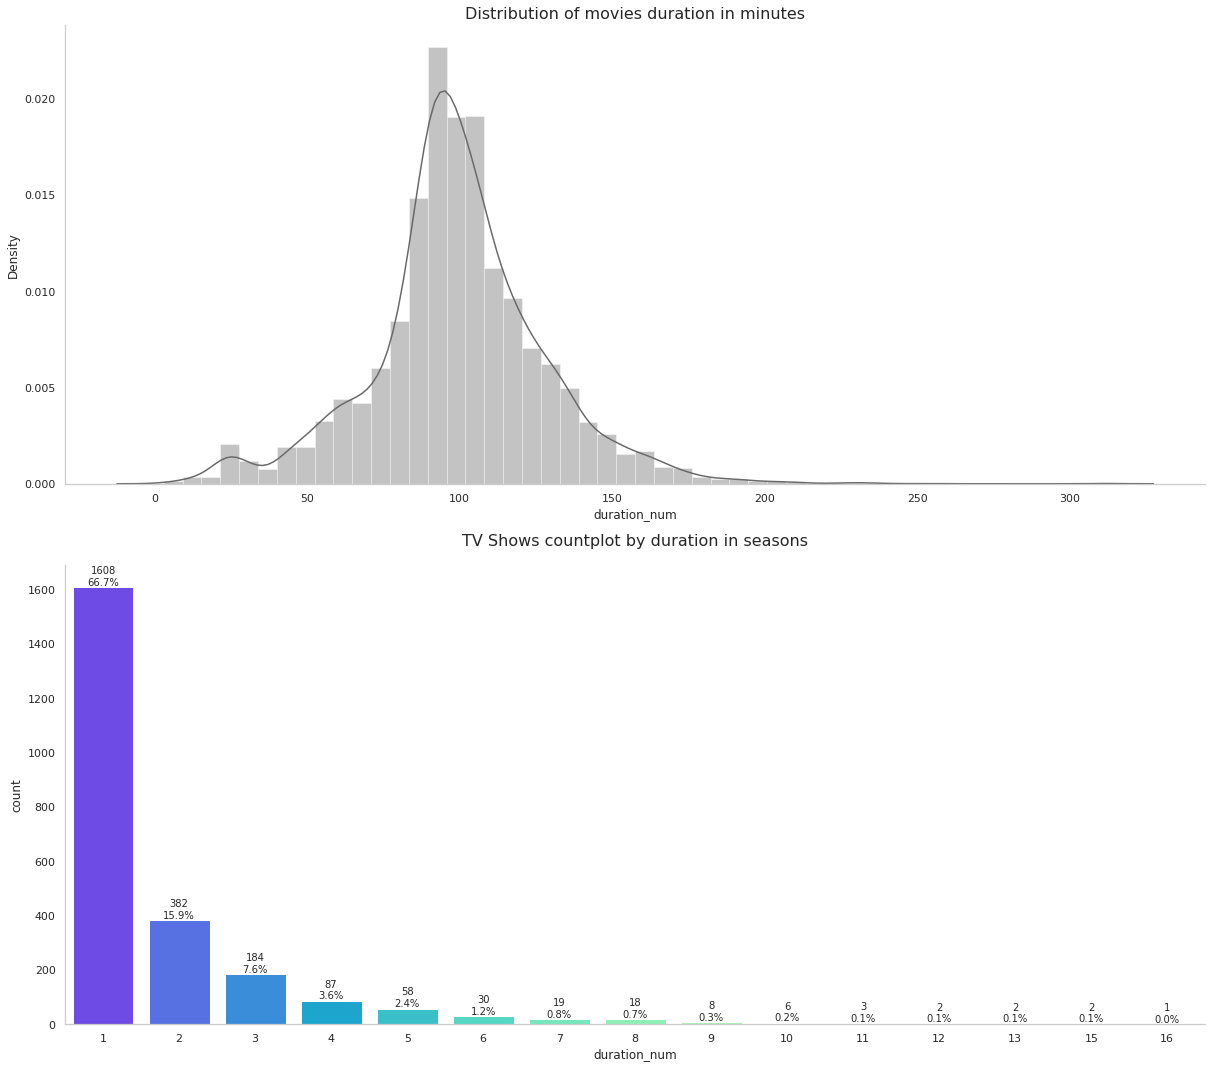

In [ ]:
# Extracting the age of the title in years
df_prep['title_age_years'] = datetime.now().year - df_prep['release_year']

# Extracting title's duration information
df_prep['duration_num'] = df_prep['duration'].apply(lambda x: int(x.split(' ')[0]))
df_prep['duration_scale'] = df_prep['duration'].apply(lambda x: x.split(' ')[-1].strip())

# Fixing duration scale name
df_prep['duration_scale'] = df_prep['duration_scale'].apply(lambda x: 'Season' if x in ('Season', 'Seasons') else x)

# Filtering movies and tvshows
movies = df_prep.query('is_movie == 1')
tvshows = df_prep.query('is_tvshow == 1')

# Plotting duration on movies
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(17, 15))
plot_distplot(df=movies, col='duration_num', ax=axs[0], color='dimgrey',
              title='Distribution of movies duration in minutes')
plot_countplot(df=tvshows, col='duration_num', ax=axs[1], color='crimson', size_labels=10,
               title='TV Shows countplot by duration in seasons')

plt.tight_layout()
plt.show()

___
* **_Top 5 movies with highest duration_**
___

In [ ]:
# Sorting movies
movies.sort_values(by='duration_num', ascending=False).head().loc[:, cols]

,type,title,country,date_added,release_year,duration
957,Movie,Black Mirror: Bandersnatch,United States,"December 28, 2018",2018,312 min
6850,Movie,The School of Mischief,Egypt,"May 21, 2020",1973,253 min
4490,Movie,No Longer kids,Egypt,"May 21, 2020",1979,237 min
3694,Movie,Lock Your Girls In,NaN,"May 21, 2020",1982,233 min
5108,Movie,Raya and Sakina,NaN,"May 21, 2020",1984,230 min


___
* **_Top 5 TV shows with most seasons_**
___

In [ ]:
# Sorting movies
tvshows.sort_values(by='duration_num', ascending=False).head().loc[:, cols]

,type,title,country,date_added,release_year,duration
2538,TV Show,Grey's Anatomy,United States,"May 9, 2020",2019,16 Seasons
5912,TV Show,Supernatural,"United States, Canada","June 5, 2020",2019,15 Seasons
4438,TV Show,NCIS,United States,"July 1, 2018",2017,15 Seasons
5137,TV Show,Red vs. Blue,United States,NaN,2015,13 Seasons
1471,TV Show,COMEDIANS of the world,United States,"January 1, 2019",2019,13 Seasons


Maybe it was well known for almost everybody, but our preparation processing showed up Grey's Anatomy and Supernatural as the top two TV shows with most seasons on Netflix catalog. Let's use the country information to see the ones with longest movies and tv shows in average.

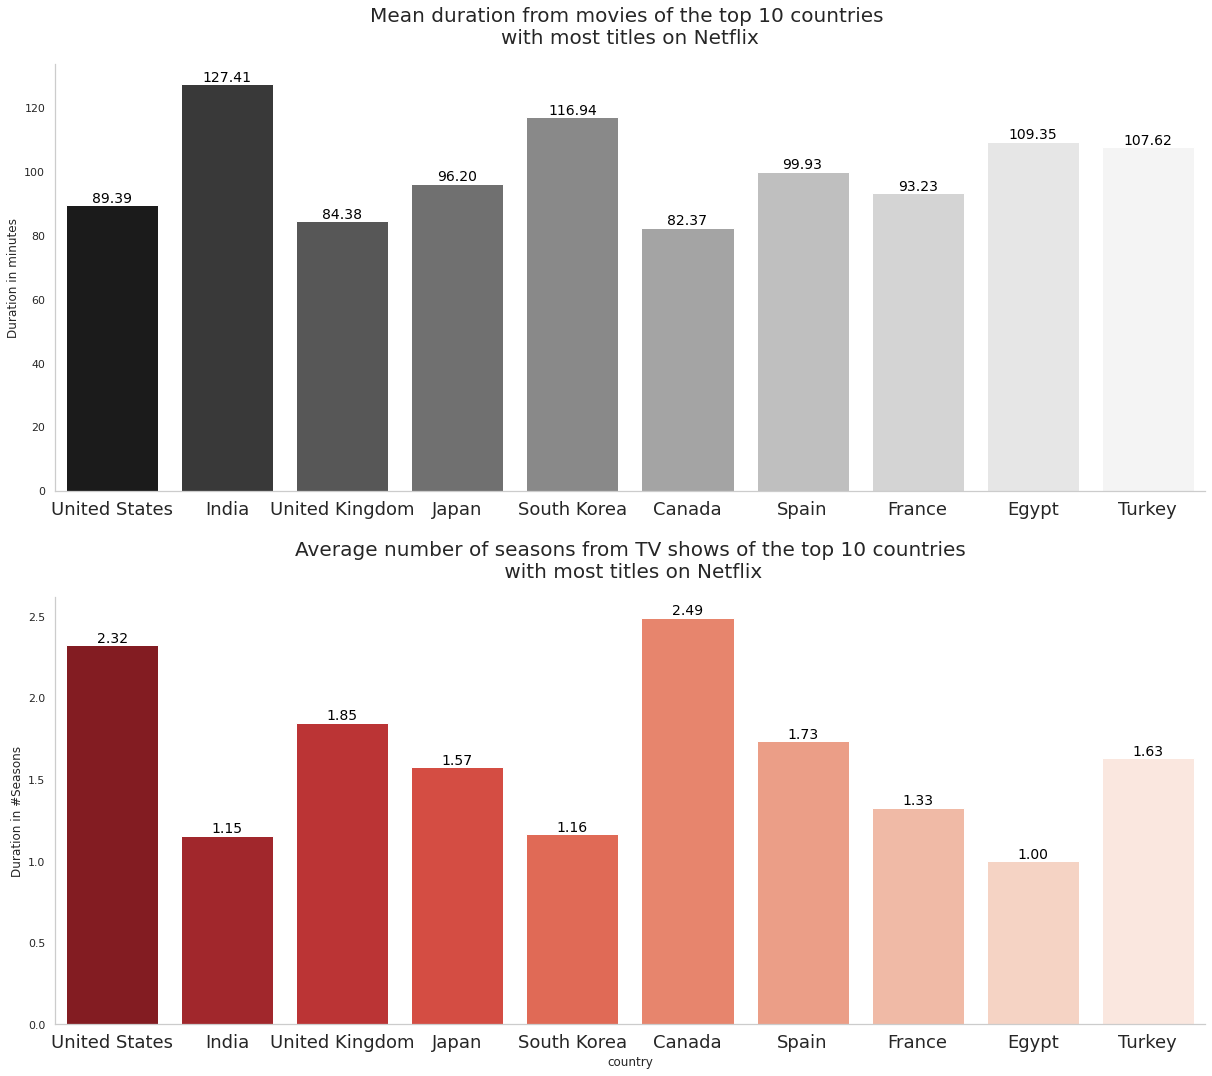

In [ ]:
# Extracting top 10 countries with most titles on Netflix
top_countries = df_prep['country'].value_counts().index[:10]
df_countries = df_prep.query('country in (@top_countries)')

# Defining figure and axis
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(17, 15))

# Plotting average duration for movies of top 10 countries
plot_aggregation(df=df_countries.query('type == "Movie"'), group_col='country', palette='Greys_r',
                 value_col='duration_num', aggreg='mean', ax=axs[0], order=top_countries, size_title=20,
                 title='Mean duration from movies of the top 10 countries \nwith most titles on Netflix')

# Plotting average number os seasons for TV shows of top 10 countries
plot_aggregation(df=df_countries.query('type == "TV Show"'), group_col='country', palette='Reds_r',
                 value_col='duration_num', aggreg='mean', ax=axs[1], order=top_countries, size_title=20,
                 title='Average number of seasons from TV shows of the top 10 countries\n with most titles on Netflix')

# Tighting layout
plt.tight_layout()
plt.setp(axs[0].get_xticklabels(), fontsize=18)
plt.setp(axs[1].get_xticklabels(), fontsize=18)
axs[0].set_xlabel('')
axs[0].set_ylabel('Duration in minutes')
axs[1].set_ylabel('Duration in #Seasons')
plt.show()

It seems like India is the country the provides movies to Netflix with highest duration (at the same time, the average number of seasons of Indian TV shows are quite low). On the other hand, we can see that Canada usually provides TV shows to Netflix with a high number of seasons in average.

Let's go ahead with our exploration and take a look at new questions to be answeared with data.

<a id="3.6"></a>
<font color="dimgrey" size=+2.0><b>3.6 Dramas or Comedies? How Are Netflix Titles Listed In?</b></font>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

On the road for gathering insights from Netflix titles dataset, let's take a deep dive on the `listed_in` column to extract some trends or patterns on how the catalog are distributed in termos of movies and TV shows types. There are more dramas than thrillers? How about comedy and cult movies?

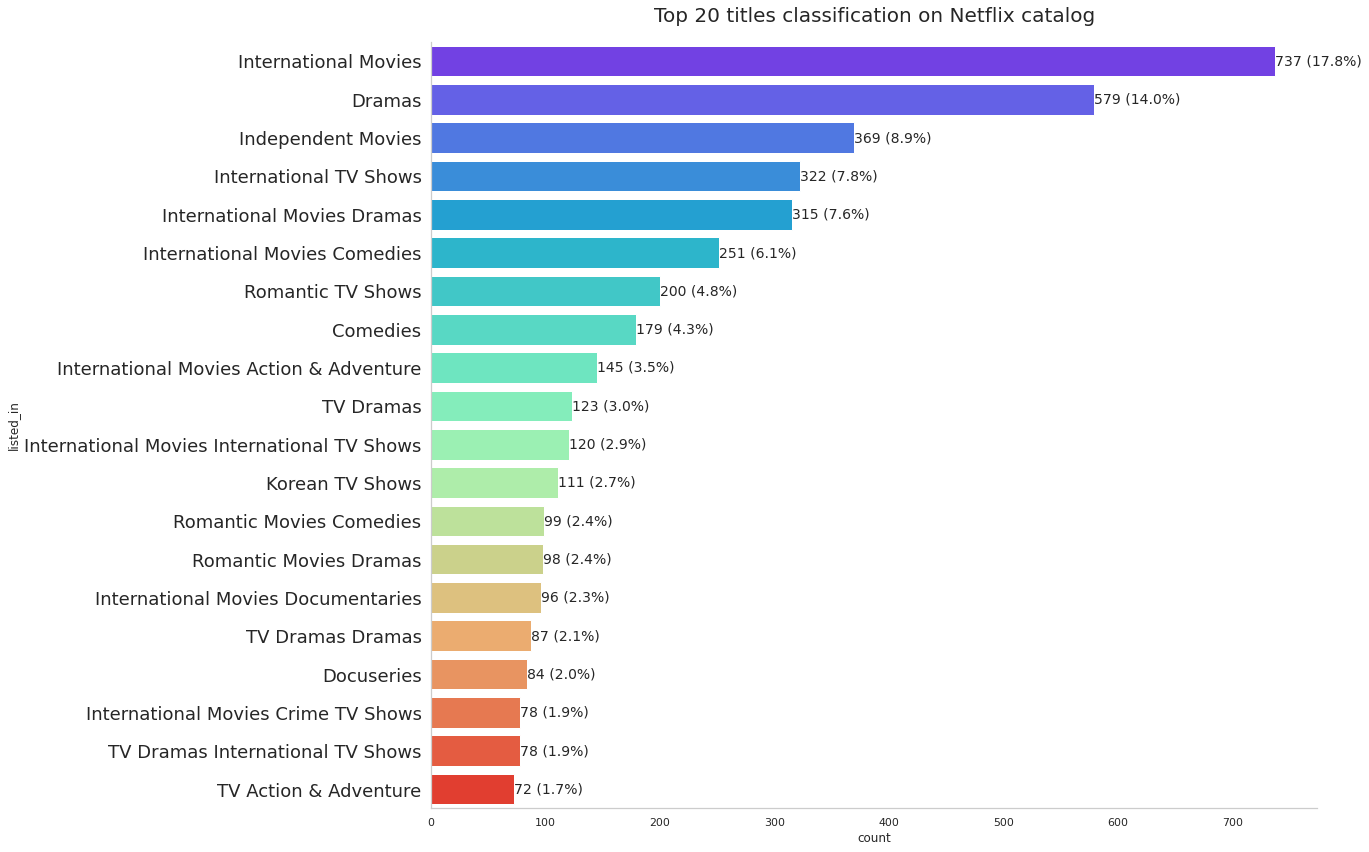

In [ ]:
# Extracting a list for titles classification
listed_titles = pd.DataFrame(extract_list_from_string(' '.join(list(df_prep['listed_in'].values))))
listed_titles.columns = ['listed_in']

# Plotting a bar chart with top N types
plot_countplot(df=listed_titles, col='listed_in', orient='h', top=20, order=True, figsize=(17, 12),
               title='Top 20 titles classification on Netflix catalog', size_title=20)

plt.tight_layout()
plt.yticks(fontsize=(18))
plt.show()

Ok, we can see that *International Movies*, *Dramas* and *Independent Movies* are the top 3 flavours of titles on Netflix. But one thing must be said: when looking at the `listed_in` column, it was possible to look at some "typos" on string entries that compose the attribute. The thing is that not all `listed_in` strings are delimited by comma, for example. Some of them were delimitted by space and that's why we can see things like *International Movies Crime TV Shows* in one category and not at least three different ones (maybe the correct was International Movies, Crime and TV Shows as separated categories).

<a id="3.8"></a>
<font color="dimgrey" size=+2.0><b>3.8 Ratings on Netflix Catalog</b></font>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

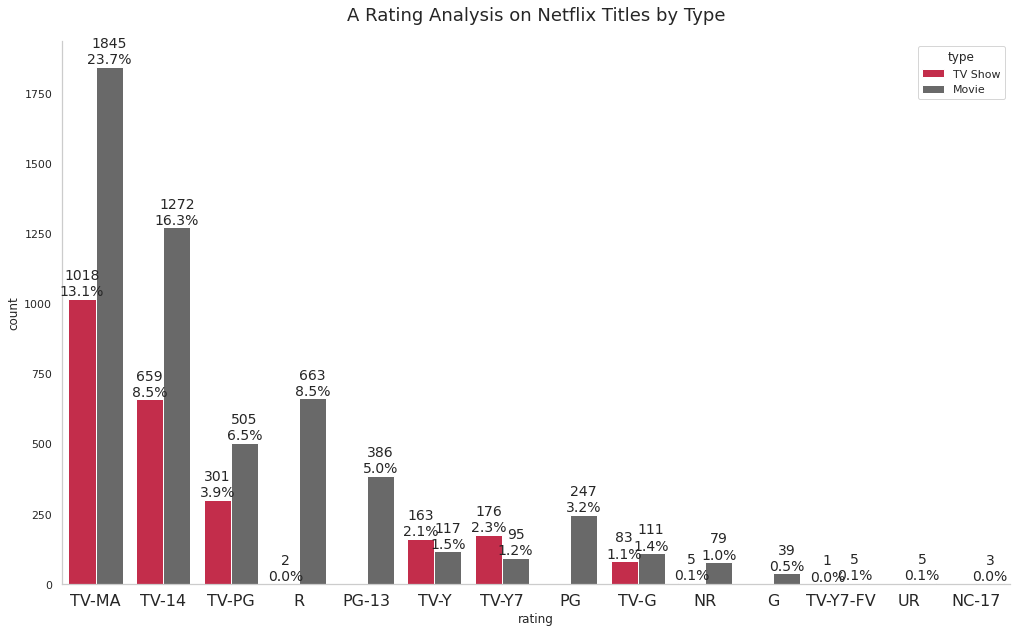

In [ ]:
# Plotting and customizing a rating analysis
plot_countplot(df, 'rating', hue='type', order=True, figsize=(17, 10), palette=['crimson', 'dimgrey'],
               title='A Rating Analysis on Netflix Titles by Type', size_title=18)
plt.xticks(fontsize=16)
plt.show()

###<b>Understanding what type content is available in different countries

In [ ]:
#Understanding what type content is available in different countries

#creating a dataframe for country and their count in our dataset
country_count = df['country'].value_counts().reset_index()
#country_count.head()

#lets see which type of the genere is watching maximum in each country 
max_genere = df.groupby('country')['listed_in'].max().reset_index()
#max_genere.head()

#perform a inner joint between country_count and max_genere
content = pd.merge(country_count, max_genere, how='inner', left_on='index', right_on='country')
#content.head()

##Count movies in each country
mov_count = []
for i in country_count['index']:
    c = len(df[(df['type']=='Movie') & (df['country']==i)])
    mov_count.append(c)
#print(mov_count)

#Count TV Show in each country
sh_count = []
for i in country_count['index']:
    c = len(df[(df['type']=='TV Show') & (df['country']==i)])
    sh_count.append(c)
#print(sh_count)

content['movie count'] = mov_count  #adding count movie list into the content dataframe
content['TV Show count'] = sh_count #adding TV Show movie list into the content dataframe

#Renaming the columns for better understanding
content = content.rename(columns = {'index':'country', 'country_x':'country count', 'listed_in':'max_genere'})

#Dropping unwanted column
content.drop('country_y', axis=1, inplace = True)

#Lets see the result
content.head()

,country,country count,max_genere,movie count,TV Show count
0,United States,2555,Thrillers,1850,705
1,India,923,TV Shows,852,71
2,United Kingdom,397,Thrillers,193,204
3,Japan,226,TV Shows,69,157
4,South Korea,183,Stand-Up Comedy,36,147


###<b>Is Netflix has increasingly focusing on TV rather than movies in recent years.

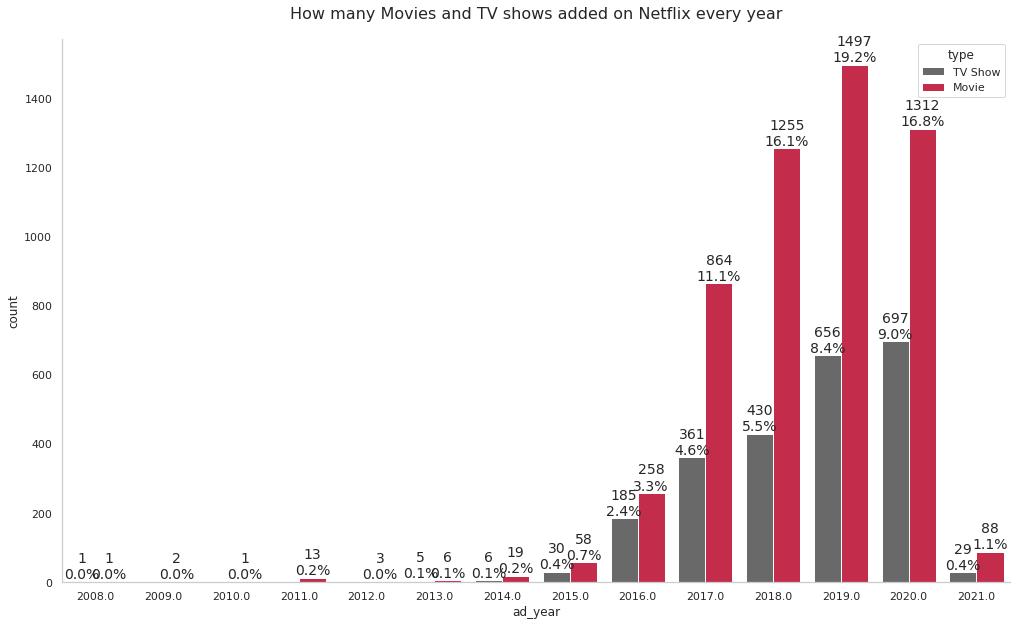

In [ ]:
df['ad_date'] = pd.to_datetime(df['date_added'])

df['ad_year'] = pd. DatetimeIndex(df['ad_date']). year

plot_countplot(df=df, col='ad_year', hue='type', figsize=(17, 10), palette=colors,
               title='How many Movies and TV shows added on Netflix every year')

#<B>Data Prepration For Modelling

# Tfidftransformer vs. Tfidfvectorizer

Both can convert the text of raw documents into a matrix of TF-IDF.

Tfidftransformer: First compute word counts by CountVectorizer, then Tfidftransformer compute IDF values and Tf-idf scores.
Tfidfvectorizer: compute at once

Use Tfidftransformer if word count vectors are needed for different tasks.

In [ ]:
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
#Replace NaN with an empty string, since the converter cannot deal with integer/float
df['description'] = df['description'].fillna('')

# Tfidftransformer

In [ ]:
#removing stopwords
tfidf = TfidfVectorizer(stop_words='english')

#get the tf-idf scores
#create TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df['description'])

#shape of tfidf_matrix
tfidf_matrix.shape

(7787, 17905)

In [ ]:
pd.DataFrame(tfidf_matrix[0].T.todense(), index=tfidf.get_feature_names(), columns=["tf-idf score"])

,tf-idf score
000,0.0
007,0.0
009,0.0
10,0.0
100,0.0
...,...
ömer,0.0
über,0.0
łukasz,0.0
ōarai,0.0


# Tfidfvectorizer

In [ ]:
#CountVectorizer: Convert a collection of text documents to a matrix of token counts
#TfidfTransformer: Transform a count matrix to a normalized tf or tf-idf representation

from sklearn.pipeline import Pipeline

pipe = Pipeline([('cv', CountVectorizer(stop_words='english')),
                ('tfid', TfidfTransformer())]).fit(df['description'])

print("CountVectorizer_matrix: {}".format(pipe['cv'].transform(df['description']).toarray()))
print("CountVectorizer_matrix: {}".format(pipe['tfid'].idf_))

CountVectorizer_matrix: [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
CountVectorizer_matrix: [6.40499131 8.35090145 9.26719219 ... 9.26719219 9.26719219 9.26719219]


In [ ]:
pipe['tfid'].idf_.shape

(17905,)

In [ ]:
#The lower the IDF value of a word, the less unique it is to any particular document
pd.DataFrame(pipe['tfid'].idf_, index=pipe['cv'].get_feature_names(), columns=['idf_weights'])

,idf_weights
000,6.404991
007,8.350901
009,9.267192
10,6.246767
100,7.252289
...,...
ömer,9.267192
über,8.861727
łukasz,9.267192
ōarai,9.267192


# Limitation of TF-IDF
As the ordering of the sentence is discarded.
- compute similarity directly in the word-count space, which may be slow for large vocabularies
- assume the counts of different words are independent
- synonyms between words are ignored, eg trip and journey

# Content-based filtering VS collaborative filtering
- Content-based filtering:
    - recommend other similar items by item features 
    - does not require other users' data during recommendations to one user.
- Collaborative filtering:
    - mimics user-to-user recommendations
    - does not need the item features

# Cosine similarity

Three way to calculate similiarity
- Euclidean distance
- Pearson correlation
- Cosine similiarity

Here cosine similarity is used. It measures the cosine of the angle between two vectors projected in a multi-dimensional space to find out how similar the documents are irrespective of their size. The smaller the angle, higher the cosine similarity.

It is advantageous because even if the two similar documents are far apart by the Euclidean distance (due to the size of the document).

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(tfidf_matrix)

In [ ]:
cosine_sim

array([[1.        , 0.        , 0.05827946, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.09600035, 0.        ,
        0.        ],
       [0.05827946, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.09600035, 0.        , ..., 1.        , 0.        ,
        0.02819239],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.02819239, 0.        ,
        1.        ]])

scikit-learn also provides pairwise metrics (aka kernels in machine learning parlance) that work for both dense and sparse representations of vector collections. In calculating similarity, a dot product is also needed (aka linear kernel).

On L2-normalized data, linear_kernel is equivalent to cosine similarity.

# Calculate cosine similarity by sklearn.pairwise.package

In [ ]:
from sklearn.metrics.pairwise import linear_kernel
cosine_sim1 = linear_kernel(tfidf_matrix, tfidf_matrix)

In [ ]:
cosine_sim1

array([[1.        , 0.        , 0.05827946, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.09600035, 0.        ,
        0.        ],
       [0.05827946, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.09600035, 0.        , ..., 1.        , 0.        ,
        0.02819239],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.02819239, 0.        ,
        1.        ]])

# **Recommendation engine by description**

In [ ]:
programme_list=df['title'].to_list()

In [ ]:
def recommend(title, cosine_similarity=cosine_sim):
    index = programme_list.index(title)
    sim_score = list(enumerate(cosine_sim[index]))
    sim_score = sorted(sim_score, key= lambda x: x[1], reverse=True)[1:11] #position 0 is the movie itself, thus exclude
    recommend_index = [i[0] for i in sim_score]
    rec_movie = df['title'].iloc[recommend_index]
    rec_score = [round(i[1],4) for i in sim_score]
    rec_table = pd.DataFrame(list(zip(rec_movie,rec_score)), columns=['Recommend programme','Similarity(0-1)'])
    return rec_table

In [ ]:
recommend('Avengers: Infinity War')

,Recommend programme,Similarity(0-1)
0,The Talented Mr. Ripley,0.1598
1,The Darkness,0.1376
2,Aliens Ate My Homework,0.1248
3,LEGO Marvel Super Heroes: Black Panther,0.1243
4,Chilling Adventures of Sabrina,0.1194
5,Vroomiz,0.1127
6,Orbiter 9,0.1094
7,Code Lyoko,0.1081
8,Vampires,0.1057
9,LEGO Marvel Super Heroes: Guardians of the Galaxy,0.1047


In [ ]:
recommend('Why Are We Getting So Fat?')

,Recommend programme,Similarity(0-1)
0,Forks Over Knives,0.1702
1,The Company Men,0.1405
2,Freeway: Crack in the System,0.1220
3,Here Alone,0.1028
4,Adam Ruins Everything,0.1028
5,X Large,0.1010
6,Marvel & ESPN Films Present: 1 of 1: Genesis,0.1000
7,The Great Hack,0.0995
8,Misfit,0.0969
9,MINDHUNTER,0.0962


The first recommended programme of "Why Are We Getting So Fat?" is "Forks Over Knives", which is also health-related and emphasing the importance of what we had eaten.

In [ ]:
recommend('About Time')

,Recommend programme,Similarity(0-1)
0,How to Be a Player,0.2325
1,Tomorrow with You,0.1992
2,The Wrong Missy,0.1916
3,The Legend of Michael Mishra,0.1880
4,World Famous Lover,0.1829
5,Jupiter Ascending,0.1758
6,Erased,0.1676
7,Carol,0.1572
8,Running Out Of Time,0.1562
9,Second 20s,0.1506


"About Time" is a British romantic comedy-drama film about a man with the ability of time travel.

From the recommendation list, some romantic programmes are suggested, while programmes with description containing abverbs of time are also listed, eg "Tomorrow with You", "Running Out Of Time", "Second 20s" that "Running Out Of Time" is a Hong Kong action thriller film, rather than romantic firm.

In [ ]:
recommend('忍者ハットリくん')

,Recommend programme,Similarity(0-1)
0,Ninja Hattori,0.5682
1,Reboot: The Guardian Code,0.1779
2,Let's Eat 2,0.1435
3,Reply 1994,0.1180
4,Deadly Switch,0.1122
5,The Married Couples,0.1074
6,My Husband Won't Fit,0.1060
7,Christmas in the Smokies,0.0980
8,Heidi,0.0890
9,Planet Earth: The Complete Collection,0.0847


"Ninja Hattori" is actually the english name of "忍者ハットリくん", so the similarity score is far more than others, and on the top of recommedation list, ie recommend itself again.

This fault is attributed by the sources of dataset, instead of the algorithm. We need to beware of the dataset whether there are duplicates that showcased in different language in our training set.

# Problem of movie series

As above recommendation engine is constructed based on description only, it probably wouldn't suggest the movies in series, but movies with more similar key words.

Let's take "Indiana Jones" series as example, its serial movie aren't the top recommendation.

In [ ]:
recommend("Indiana Jones and the Last Crusade")

,Recommend programme,Similarity(0-1)
0,Fate/Apocrypha,0.2318
1,Fate/EXTRA Last Encore,0.1949
2,Fate/Zero,0.1905
3,Indiana Jones and the Temple of Doom,0.1896
4,Fate/stay night: Unlimited Blade Works,0.1859
5,Indiana Jones and the Raiders of the Lost Ark,0.1820
6,Monty Python and the Holy Grail,0.1727
7,Indiana Jones and the Kingdom of the Crystal S...,0.1643
8,Pajanimals,0.1561
9,Dragons: Dawn of the Dragon Racers,0.1194


Sometimes, we watch movies not only based on genres, but the directors' filming style.

Steven Spielberg is a famous director and he has 12 movies in this dataset, including Indiana Jones' series, so movies filmed by him should also on the list.

In [ ]:
df.loc[df['director']=='Steven Spielberg']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,ad_date,ad_year
1242,s1243,Movie,Catch Me If You Can,Steven Spielberg,"Leonardo DiCaprio, Tom Hanks, Christopher Walk...","United States, Canada","January 1, 2021",2002,PG-13,141 min,Dramas,An FBI agent makes it his mission to put cunni...,2021-01-01,2021.0
2799,s2800,Movie,Hook,Steven Spielberg,"Dustin Hoffman, Robin Williams, Julia Roberts,...",United States,"January 15, 2021",1991,PG,142 min,Children & Family Movies,"Peter Pan, now grown up and a workaholic, must...",2021-01-15,2021.0
2990,s2991,Movie,Indiana Jones and the Kingdom of the Crystal S...,Steven Spielberg,"Harrison Ford, Cate Blanchett, Karen Allen, Ra...",United States,"January 1, 2019",2008,PG-13,123 min,"Action & Adventure, Children & Family Movies, ...",Indiana Jones is drawn into a Russian plot to ...,2019-01-01,2019.0
2991,s2992,Movie,Indiana Jones and the Last Crusade,Steven Spielberg,"Harrison Ford, Sean Connery, Denholm Elliott, ...",United States,"January 1, 2019",1989,PG-13,127 min,"Action & Adventure, Children & Family Movies, ...","Accompanied by his father, Indiana Jones sets ...",2019-01-01,2019.0
2992,s2993,Movie,Indiana Jones and the Raiders of the Lost Ark,Steven Spielberg,"Harrison Ford, Karen Allen, Paul Freeman, Rona...",United States,"January 1, 2019",1981,PG,116 min,"Action & Adventure, Children & Family Movies, ...",When Indiana Jones is hired by the government ...,2019-01-01,2019.0
2993,s2994,Movie,Indiana Jones and the Temple of Doom,Steven Spielberg,"Harrison Ford, Kate Capshaw, Amrish Puri, Rosh...",United States,"January 1, 2019",1984,PG,119 min,"Action & Adventure, Children & Family Movies, ...","Indiana Jones, his young sidekick and a spoile...",2019-01-01,2019.0
3646,s3647,Movie,Lincoln,Steven Spielberg,"Daniel Day-Lewis, Sally Field, David Strathair...","United States, India","February 21, 2018",2012,PG-13,150 min,Dramas,Director Steven Spielberg takes on the towerin...,2018-02-21,2018.0
5430,s5431,Movie,Schindler's List,Steven Spielberg,"Liam Neeson, Ben Kingsley, Ralph Fiennes, Caro...",United States,"April 1, 2018",1993,R,195 min,"Classic Movies, Dramas",Oskar Schindler becomes an unlikely humanitari...,2018-04-01,2018.0
6069,s6070,Movie,The Adventures of Tintin,Steven Spielberg,"Jamie Bell, Andy Serkis, Daniel Craig, Nick Fr...","United States, New Zealand, United Kingdom","November 20, 2019",2011,PG,107 min,Children & Family Movies,This 3-D motion capture adapts Georges Remi's ...,2019-11-20,2019.0
7478,s7479,Movie,War Horse,Steven Spielberg,"Emily Watson, David Thewlis, Peter Mullan, Nie...","United States, India","May 6, 2019",2011,PG-13,147 min,Dramas,"During World War I, the bond between a young E...",2019-05-06,2019.0


# **Recommendation engine by 5 attributes**

In [ ]:
#select programme type,country,genres,director & description
#join all the info together
#convert all words into lowercase so that algorithm will not distinguish as independent words
def bag_of_words(dt):
    features = dt['type']+' '+dt['country']+' '+dt['listed_in']+' '+dt['director']+' '+dt['description']
    return features.fillna('').str.lower()

In [ ]:
features = bag_of_words(df)

In [ ]:
features.head(10)

0                                                     
1    movie mexico dramas, international movies jorg...
2    movie singapore horror movies, international m...
3    movie united states action & adventure, indepe...
4    movie united states dramas robert luketic a br...
5    tv show turkey international tv shows, tv dram...
6    movie egypt horror movies, international movie...
7    movie united states dramas kevin reynolds afte...
8    movie india horror movies, international movie...
9    movie india horror movies, international movie...
dtype: object

In [ ]:
tfidf_matrix2 = tfidf.fit_transform(features)                
tfidf_matrix2.shape

(7787, 18992)

In [ ]:
cosine_sim2 = cosine_similarity(tfidf_matrix2)

In [ ]:
def recommend2(title, cosine_similarity=cosine_sim2):
    index = programme_list.index(title)
    sim_score = list(enumerate(cosine_sim2[index]))
    sim_score = sorted(sim_score, key= lambda x: x[1], reverse=True)[1:11] #position 0 is the movie itself, thus exclude
    recommend_index = [i[0] for i in sim_score]
    rec_movie = df['title'].iloc[recommend_index]
    rec_score = [round(i[1],4) for i in sim_score]
    rec_table = pd.DataFrame(list(zip(rec_movie,rec_score)), columns=['Recommend programme','Similarity(0-1)'])
    return rec_table

Take Indiana Jones's series as example again, new recommendation engine now suggest its serial movies in the highest ranking. 

Also, Steven Spielberg's movies, such as "Schindler's List", "Lincoln", "The Adventures of Tintin Hook" are also on the list. "Indiana Jones and the Last Crusade" is about searching Holy Grail, in which story plot is similar to "Monty Python and the Holy Grail", so has a higher ranking.

In [ ]:
recommend2("Indiana Jones and the Last Crusade")

,Recommend programme,Similarity(0-1)
0,Indiana Jones and the Temple of Doom,0.3764
1,Indiana Jones and the Raiders of the Lost Ark,0.3609
2,Indiana Jones and the Kingdom of the Crystal S...,0.2933
3,Monty Python and the Holy Grail,0.2480
4,Lincoln,0.2091
5,The Adventures of Tintin,0.1658
6,Hook,0.1570
7,Schindler's List,0.1529
8,Jagga Jasoos,0.1451
9,The Do-Over,0.1418
